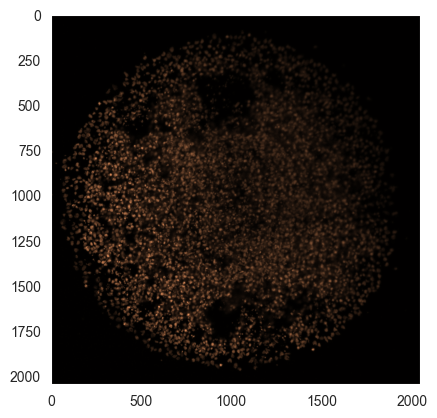

In [52]:
from micropattern_analysis import *
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

files = [file for file in gather_files("C:/Users/flori/OneDrive - Universität Wien/Adameyko Lab/FS1_MP_ISTA_MIFF1/") if
         "ISL" not in file]
img = iio.imread(files[-1])
plt.imshow(img[0][0], cmap="gray")
plt.imshow(img[0][1], cmap="copper")
plt.grid(False)
plt.show()

In [22]:
edu, dapi = np.argmax(np.sum(np.sum(img, axis=2), axis=2), axis=0)

In [67]:
from skimage.filters import threshold_li, threshold_isodata, threshold_sauvola, threshold_niblack
from skimage.morphology import white_tophat, black_tophat

edu_image = img[edu][0]
dapi_image = img[dapi][1]

edu_image = edu_image > threshold_li(edu_image)
dapi_image = dapi_image > threshold_li(dapi_image)

edu_count = np.count_nonzero(edu_image)
dapi_count = np.count_nonzero(dapi_image)
total_count = np.count_nonzero(edu_image * dapi_image)

#plt.imshow(dapi_image, cmap="gray_r")
#plt.show()
print(dapi_count, edu_count)

1486807 1014645


In [76]:
from skimage.filters import threshold_li
import os

path = "C:/Users/flori/OneDrive - Universität Wien/Adameyko Lab/FS1_MP_ISTA_MIFF1/"
time = []
ratio = []
for file in gather_files(path):
    if "ISL" not in file:
        img = iio.imread(file)

        edu, dapi = np.argmax(np.sum(np.sum(img, axis=2), axis=2), axis=0)
        edu_image = img[edu][0]
        dapi_image = img[dapi][1]

        edu_image = edu_image > threshold_li(edu_image)
        dapi_image = dapi_image > threshold_li(dapi_image)

        edu_count = np.count_nonzero(edu_image)
        dapi_count = np.count_nonzero(dapi_image)
        total_count = np.count_nonzero(edu_image * dapi_image)

        time.append(f"{os.path.basename(os.path.dirname(file))}")
        ratio.append(total_count / dapi_count)
dic = {
    "time": time,
    "ratio": ratio
}

In [ ]:
# TODO: compare positive edu pixels to normal image
# TODO: number of dapi positive pixels vs. time
# TODO: compare unedited edu images vs. time
# TODO: edu distance from center
# TODO: compare this with distances of other zones

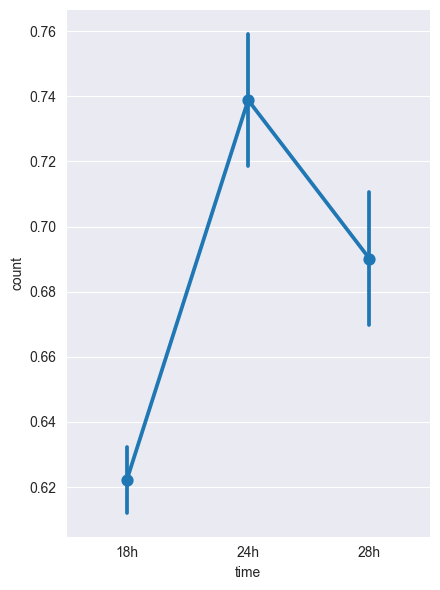

In [77]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(dic)
sns.catplot(df, x="time", y="count", errorbar="se",
    kind="point", height=6, aspect=.75)

C:\Users\flori\AppData\Local\Temp\ipykernel_10912\421064880.py:5: RuntimeWarning: divide by zero encountered in divide
  du = D * (1 / r) * (np.gradient(np.gradient(u, r), r)) + a * u - b * u * v**2
C:\Users\flori\AppData\Local\Temp\ipykernel_10912\421064880.py:5: RuntimeWarning: invalid value encountered in multiply
  du = D * (1 / r) * (np.gradient(np.gradient(u, r), r)) + a * u - b * u * v**2
C:\Users\flori\AppData\Local\Temp\ipykernel_10912\421064880.py:6: RuntimeWarning: divide by zero encountered in divide
  dv = D * (1 / r) * (np.gradient(np.gradient(v, r), r)) + h * u * v**2 - e * v
C:\Users\flori\AppData\Local\Temp\ipykernel_10912\421064880.py:6: RuntimeWarning: invalid value encountered in multiply
  dv = D * (1 / r) * (np.gradient(np.gradient(v, r), r)) + h * u * v**2 - e * v


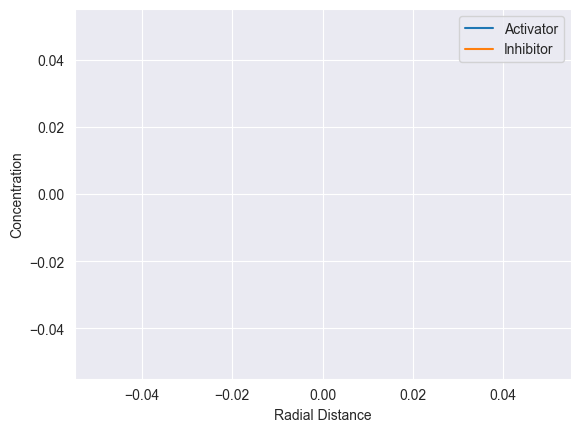

[[1.         1.         1.         ... 1.         1.         1.        ]
 [       nan 1.003078   1.003078   ... 1.003078   1.003078   1.003078  ]
 [       nan        nan        nan ... 1.00616547 1.00616547 1.00616547]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [nan  0.  0. ...  0.  0.  0.]
 [nan nan nan ...  0.  0.  0.]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
